# Concepts in MOO

In this notebook we shall see how to 

1. Compute non-dominated set of solutions from a set of pool of points
2. How to compute hyper volume given a non-dominated set of solutions and a reference point

In [9]:
!pip install matplotlib

## 2D Case 

Let us create some 2D points to start with. We will generate 100 points. We will generate a random points in a circle with radius $r=(0, 1)$ and $\theta=(0., 2\pi)$. We will simply use (-x, -y) so that we can find the minimum 

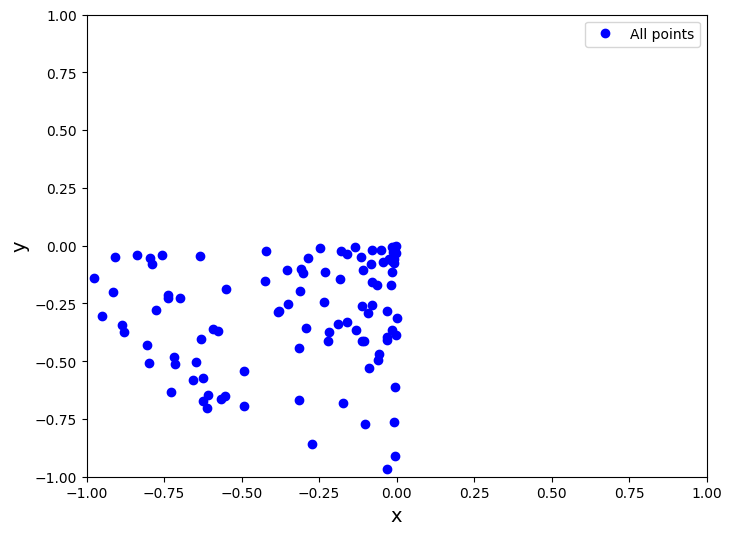

In [25]:
# Generate some points. 

import random, math
import matplotlib.pyplot as plt

n_points = 100
r_points = [-1.*random.random() for _ in range(n_points)] #0 - 1
th_points = [random.uniform(0., 2*math.pi) for _ in range(n_points)] #circle

points = [(r_points[i]*abs(math.cos(th_points[i])), r_points[i]*abs(math.sin(th_points[i]))) for i in range(n_points)]


# Print the results.
plt.figure(1, figsize=(8, 6))
plt.plot([p[0] for p in points], [p[1] for p in points], 'bo', label='All points')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

## Non dominated sorting

Non-dominated sorting is a technique used in multi-objective optimization to identify the Pareto-optimal solutions from a set of candidate solutions. In multi-objective optimization, we aim to optimize multiple conflicting objectives simultaneously.

Mathematically, let's consider a set of solutions S, where each solution s ∈ S is represented by a vector of objective values f(s) = (f1(s), f2(s), ..., fn(s)). The goal of non-dominated sorting is to partition the set S into different fronts, where each front contains solutions that are not dominated by any other solution in the same front.

A solution s1 dominates another solution s2 if and only if:
1. For all objectives i, $f_{i}(s_{1}) ≤ f_{i}(s_{2})$, and
2. There exists at least one objective j such that fj(s1) < fj(s2).

To perform non-dominated sorting, we can use the following steps:

1. Initialize an empty list of fronts, F.
2. Initialize an empty set of solutions that are dominated by other solutions, D.
3. For each solution s in S, do the following:
    a. Initialize the domination count, n_dom, as 0.
    b. Initialize an empty set of solutions that s dominates, S_dom.
    c. For each solution p in S, excluding s, do the following:
        i. If s dominates p, add p to S_dom.
        ii. If p dominates s, increment n_dom by 1.
    d. If n_dom is 0, add s to the first front (F[0]).
    e. If n_dom > 0, add s to D and store S_dom as the set of solutions dominated by s.
4. Initialize the front index, i, as 0.
5. While F[i] is not empty, do the following:
    a. Initialize an empty list for the next front, F_next.
    b. For each solution s in F[i], do the following:
        i. For each solution q in the set of solutions dominated by s, do the following:
            - Decrement the domination count of q by 1.
            - If the domination count of q becomes 0, add q to F_next.
    c. Increment i by 1.
    d. Append F_next to F.
6. Return the list of fronts, F, where each front contains non-dominated solutions.

Now, let's build a function that performs non-dominated sorting:

In the above code, the `dominates()` function is a helper function that checks if one solution dominates another based on the defined dominance criteria.

You can use this `non_dominated_sorting()` function to perform non-dominated sorting on a set of solutions and obtain the Pareto-optimal fronts.

In [26]:
def dominates(point1, point2, epsilon=1e-4):
    """ Check if point1 dominates point2 based on two criteria (minimization). """
    return all(p1 <= p2 + epsilon for p1, p2 in zip(point1, point2)) and any(p1 < p2 - epsilon for p1, p2 in zip(point1, point2))

def non_dominated_solutions(points, epsilon=1e-4):
    """ Find non-dominated solutions (Pareto front) from a list of points. """
    dominated = set()
    pareto_front = []

    for i, point1 in enumerate(points):
        if i in dominated:
            continue
        pareto_front.append(point1)
        for j, point2 in enumerate(points[i + 1:], start=i + 1):
            if dominates(point1, point2, epsilon):
                dominated.add(j)
            elif dominates(point2, point1, epsilon):
                pareto_front.pop()
                break

    return pareto_front

### Computational complexity of this 


**Outer Loop (First For Loop)**:
The outer loop iterates over each point in the list points.
If there are `n` points, this loop runs `n` times.

 - Complexity: $O(n)$

**Inner Loop (Second For Loop)**:

The inner loop iterates over each subsequent point in the list points starting from i + 1 (where i is the current index of the outer loop).

For each point point1, it compares against all subsequent points point2 to determine dominance.

In the worst case, if all points are non-dominated, each point point1 might be compared against all n−i−1 points in the inner loop.

 - Complexity: $O(n^{2})$ in the worst case, where each point is compared against all other points.

**Domination Check (dominates Function)**:

The dominates function compares two points in three dimensions, which is O(3)O(3) or O(1)O(1) constant time operation (since the dimensions are fixed).

**Space Complexity**:
        
The space complexity is primarily determined by the dominated set and the pareto_front list.
In the worst case, both can grow up to nn in size, resulting in $O(n)$ space complexity.

**Total Computational Complexity**

Given the analysis above, the overall computational complexity of finding the Pareto front using the provided algorithm is dominated by the inner loop, which is $O(n^{2})$.


Let us now plot and check if it works

Non-dominated solutions (Pareto front): [(-0.7265206008381233, -0.6318989506850146), (-0.8847599354721827, -0.3411096370327478), (-0.2737679594842565, -0.858867779811139), (-0.8795988371523966, -0.3730706501878335), (-0.9491654630991407, -0.30580590829974347), (-0.9772194698525686, -0.1385923857787441), (-0.030487493008355245, -0.9656243286700339), (-0.6130231133713735, -0.7046592373273107), (-0.7977797384921846, -0.5086194822542436), (-0.6240255605762097, -0.6703524228389718), (-0.8040638691391823, -0.43066427130250234)]


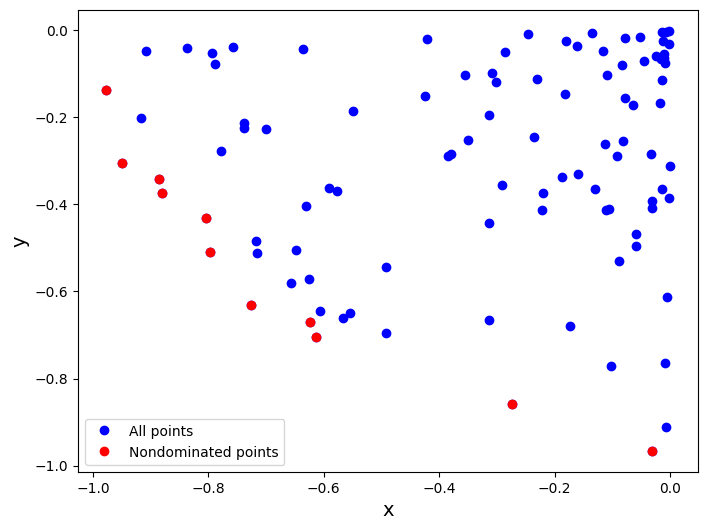

In [32]:
pareto_front = non_dominated_solutions(points)
print("Non-dominated solutions (Pareto front):", pareto_front)

plt.figure(2, figsize=(8, 6))
plt.plot([p[0] for p in points], [p[1] for p in points], 'bo', label='All points')
plt.plot([p[0] for p in pareto_front], [p[1] for p in pareto_front], 'ro', label='Nondominated points')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

## Excersise:

### 1. Can you implement the same function but for maximization?
### 2. Can you implement the same function but for 3D points?
### 3. Can you have an isight on how to go about a `N-D` case?

## Computing Hyper Volume

Let us remind ourself about MOO and what hypervolume is 

![image.png](../images/moo_concept/hv_recap.png)

In multi-objective optimization (MOO), the goal is to find a set of solutions that represents the trade-off between multiple conflicting objectives. One way to evaluate the quality of these solutions is by using a metric called hypervolume.

### Hypervolume

Hypervolume is a measure of the dominated space in the objective space. It quantifies the extent of the Pareto-optimal front, which represents the best possible trade-off between the objectives. The hypervolume metric considers both the spread and density of solutions in the objective space.

The hypervolume is calculated by defining a reference point, which represents the ideal values for each objective. The hypervolume is then computed as the volume of the dominated space between the Pareto-optimal front and the reference point.

### Convergence Tracking

Convergence tracking is an important aspect of MOO algorithms. It helps us understand how well the algorithm is progressing towards finding the Pareto-optimal front. Hypervolume is a useful tool for tracking convergence because it provides a quantitative measure of the quality of the obtained solutions.

As the MOO algorithm iteratively improves the solutions, the hypervolume should increase. A higher hypervolume indicates a larger dominated space, which means that the algorithm is finding better solutions that are closer to the true Pareto-optimal front.

By monitoring the hypervolume over iterations, we can assess the convergence behavior of the algorithm. If the hypervolume increases rapidly and then plateaus, it may indicate that the algorithm has reached a local optimum. On the other hand, if the hypervolume continues to increase steadily, it suggests that the algorithm is exploring the solution space effectively and converging towards the true Pareto-optimal front.

### Tracking Convergence with Hypervolume

To track convergence using hypervolume, we can calculate the hypervolume at each iteration of the MOO algorithm and plot it over time. This allows us to visualize the progress of the algorithm and make informed decisions about when to stop the optimization process.

By analyzing the hypervolume plot, we can gain insights into the convergence behavior of the MOO algorithm. If the hypervolume increases steadily and reaches a plateau, it suggests that the algorithm has converged. On the other hand, if the hypervolume fluctuates or decreases, it indicates that the algorithm is not converging effectively and may require further adjustments.

Tracking convergence using hypervolume provides a quantitative measure of the optimization progress and helps in making informed decisions during the MOO process.


```{tip}
Can you think on how can you compute this hypervolume for a 2D case?
```

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def compute_hypervolume(points, reference_point):
    """
    Compute the hypervolume from a given set of 2D points which are non-dominating solutions.
    
    Args:
        points (list): List of 2D points representing non-dominating solutions.
        reference_point (tuple): Reference point as a 2D point.
        
    Returns:
        float: The hypervolume of the non-dominating solutions.
    """
    # Sort the points based on the x-coordinate in ascending order
    sorted_points = sorted(points, key=lambda p: p[0])
    
    # Initialize the hypervolume to 0
    hypervolume = 0
    
    # Initialize the previous y-coordinate to the maximum y-coordinate
    prev_y = max(sorted_points, key=lambda p: p[1])[1]
    
    # Iterate over the sorted points
    for point in sorted_points:
        # Calculate the width of the rectangle
        width = point[0] - sorted_points[0][0]
        
        # Calculate the height of the rectangle
        height = point[1] - prev_y
        
        # Update the hypervolume
        hypervolume += width * height
        
        # Update the previous y-coordinate
        prev_y = point[1]
    
    # Calculate the width of the last rectangle
    width = reference_point[0] - sorted_points[0][0]
    
    # Calculate the height of the last rectangle
    height = reference_point[1] - prev_y
    
    # Update the hypervolume with the last rectangle
    hypervolume += width * height
    
    return hypervolume

In [35]:

n_points = 100
r_points = [-1.*random.random() for _ in range(n_points)] #0 - 1
th_points = [random.uniform(0., 2*math.pi) for _ in range(n_points)] #circle

points = [(r_points[i]*abs(math.cos(th_points[i])), r_points[i]*abs(math.sin(th_points[i]))) for i in range(n_points)]

pareto_front = non_dominated_solutions(points)

reference_point = (0.5, 0.5)

hypervolume = compute_hypervolume(pareto_front, reference_point)
print("Hypervolume:", hypervolume)


Hypervolume: 1.8049975252594017
